<a href="https://colab.research.google.com/github/ashiqur9/Facial_Recognition_Using_Keras/blob/master/Expand_Dataset_Size(Augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import necessary library
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import numpy as np
import cv2
import time
import os
from random import randint

In [0]:
#path to image dataset
path = '/content/drive/My Drive/Dataset/Train/'

In [6]:
#Number of classes
n_classes=0
for dir in os.listdir(path):
    n_classes +=1   
    print(path+dir)# 1-hot encoding
a = np.array([i for i in range(n_classes)])
classes = np.zeros((a.size, a.max() + 1))
classes[np.arange(a.size), a] = 1

/content/drive/My Drive/Dataset/Train/robert_downey_jr
/content/drive/My Drive/Dataset/Train/Chris_Hemsworth
/content/drive/My Drive/Dataset/Train/Chris_Evans
/content/drive/My Drive/Dataset/Train/Mark_Ruffalo
/content/drive/My Drive/Dataset/Train/Scarlett_Johansson
/content/drive/My Drive/Dataset/Train/Cobie_Smulders
/content/drive/My Drive/Dataset/Train/Tom_Holland
/content/drive/My Drive/Dataset/Train/Paul_Rudd


In [8]:
 n_classes

8

In [9]:
train_array = []
test_array = []
dir_array = []
# let random index and 9th(enumerate begins at 0 so index 8 represents image 9) pgm for test
for dir in os.listdir(path):
    print(path+dir)
    i1, i2 = 8, randint(0, 7)
    for idx, img in enumerate(sorted(os.listdir(path + dir))):
        image = cv2.imread(path + dir + '/' + img)
        #image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (128,128))
        data = img_to_array(image)
        # expand dimension to one sample
        samples = expand_dims(data, 0)
        # create image data augmentation generator
        datagen = ImageDataGenerator(width_shift_range=[-1,1],
                                 #height_shift_range=0.1,
                                 horizontal_flip=True,
                                 rotation_range=60,
                                 brightness_range=[0.5,1.0],
                                 zoom_range=[0.8,1.0]
                                
                                )
        # prepare iterator
        #counter=0
        it = datagen.flow(samples, batch_size=1)
        #print('total images:',len(it))
        # generate samples and plot
        for i in range(15):
            # define subplot
            #pyplot.subplot(330 + 1 + i)
            # generate batch of images
            batch = it.next()
            # convert to unsigned integers for viewing
            image = batch[0].astype('uint8')
            #print(counter)
            #counter+=1
        
            # plot raw pixel data
            #pyplot.imshow(image)
            #image = image[:, :, np.newaxis]
            #print(image.shape)
            if idx == i1 or idx == i2:
                test_array.append((image, classes[os.listdir(path).index(dir)]))
                continue
 
            train_array.append((image, classes[os.listdir(path).index(dir)]))
    dir_array.append(dir)
# show the figure
    #pyplot.show()
    #time.sleep(10)

/content/drive/My Drive/Dataset/Train/robert_downey_jr
/content/drive/My Drive/Dataset/Train/Chris_Hemsworth
/content/drive/My Drive/Dataset/Train/Chris_Evans
/content/drive/My Drive/Dataset/Train/Mark_Ruffalo
/content/drive/My Drive/Dataset/Train/Scarlett_Johansson
/content/drive/My Drive/Dataset/Train/Cobie_Smulders
/content/drive/My Drive/Dataset/Train/Tom_Holland
/content/drive/My Drive/Dataset/Train/Paul_Rudd


In [10]:
dir_array

['robert_downey_jr',
 'Chris_Hemsworth',
 'Chris_Evans',
 'Mark_Ruffalo',
 'Scarlett_Johansson',
 'Cobie_Smulders',
 'Tom_Holland',
 'Paul_Rudd']

In [0]:
train_images, train_labels = np.array([t[0] for t in train_array]), np.array([t[1] for t in train_array])
test_images, test_labels = np.array([t[0] for t in test_array]), np.array([t[1] for t in test_array])

In [0]:
train_array = []
test_array = []

In [14]:
train_images.shape

(56145, 128, 128, 3)

In [0]:
 from sklearn.utils import shuffle
train_images,train_labels=shuffle(train_images,train_labels)
 
test_images,test_labels=shuffle(test_images,test_labels)

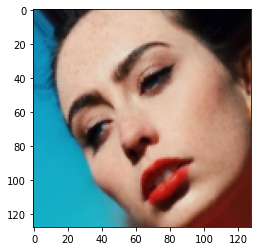

In [16]:
import matplotlib.pyplot as plt
plt.imshow(test_images[150])

In [17]:
test_labels[150]

array([0., 0., 0., 0., 0., 1., 0., 0.])

In [0]:
import pickle
dict={
    'train_images':train_images,
    'train_labels':train_labels,
    'test_images':test_images,
    'test_labels':test_labels,
    'target':dir_array,
    'classes':classes,
    'info':'Dataset Contain celebrety photos in 5 classes for image classification purpose. Image resulution is 128x128'
 
}
f = open("/content/drive/My Drive/Dataset/Avengers.pkl","wb")
pickle.dump(dict,f)
f.close()